In [55]:
from pandas_datareader import data, wb
import os as os
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
%matplotlib inline

# Importing and Cleaning code

In [88]:
cov_data=pd.read_csv(r'C:\Users\admin\Desktop\ML\COVID project\covid_data.csv')
cov_data.head(10)

,Event_Date,Event
0,2020-01-04,WHO Announces Pneumonia Cases of Unknown Cause
1,2020-01-08,CDC Issues Health Advisory
2,2020-01-09,CDC Notes Appearance of Novel Coronavirus Out...
3,2020-01-17,CDC Announces Enhanced Screenings for Those T...
4,2020-01-21,Washington State Department of Health Announc...
5,2020-01-22,CDC Adds Two Airports to Coronavirus Screening
6,2020-01-29,Federal Reserve Issues FOMC Statement
7,2020-01-30,"WHO Declares ""Public Health Emergency of Inte..."
8,2020-01-31,Secretary Azar Declares Public Health Emergen...
9,2020-02-02,State Department Warns Americans Not to Trave...


In [92]:
cov_data=cov_data.sort_values('Event_Date')

In [93]:
cov_data.reset_index(drop=True, inplace=True)
cov_data.head()

,Event_Date,Event
0,2020-01-04,WHO Announces Pneumonia Cases of Unknown Cause
1,2020-01-08,CDC Issues Health Advisory
2,2020-01-09,CDC Notes Appearance of Novel Coronavirus Out...
3,2020-01-17,CDC Announces Enhanced Screenings for Those T...
4,2020-01-21,Washington State Department of Health Announc...


# Checking target dates

In [5]:
cov_data.iloc[0]


Event_Date                                         2020-01-04
Event          WHO Announces Pneumonia Cases of Unknown Cause
Name: 0, dtype: object

In [6]:
cov_data.iloc[201]


Event_Date                                         2022-01-10
Event          Daily COVID-19 Cases in U.S. Surpass 1 Million
Name: 201, dtype: object

# Cleaning

In [7]:
cov_data.head()

,Event_Date,Event
0,2020-01-04,WHO Announces Pneumonia Cases of Unknown Cause
1,2020-01-08,CDC Issues Health Advisory
2,2020-01-09,CDC Notes Appearance of Novel Coronavirus Out...
3,2020-01-17,CDC Announces Enhanced Screenings for Those T...
4,2020-01-21,Washington State Department of Health Announc...


In [8]:
cov_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Event_Date  202 non-null    object
 1   Event       202 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


In [9]:
BAC= data.DataReader("BAC", "av-daily", start=datetime(2020,1,4), end=datetime(2022, 1, 10), api_key='LOOET3LLVYSQYSZH')
C = data.DataReader("C", "av-daily",  start=datetime(2020,1,4), end=datetime(2022, 1, 10), api_key='LOOET3LLVYSQYSZH')
JPM = data.DataReader("JPM", "av-daily",  start=datetime(2020,1,4), end=datetime(2022, 1, 10), api_key='LOOET3LLVYSQYSZH')
MS = data.DataReader("MS", "av-daily",  start=datetime(2020,1,4), end=datetime(2022, 1, 10), api_key='LOOET3LLVYSQYSZH')
WFC = data.DataReader("WFC", "av-daily",  start=datetime(2020,1,4), end=datetime(2022, 1, 10), api_key='LOOET3LLVYSQYSZH')


In [10]:
column_names = ['BAC', 'C', 'JPM', 'MS', 'WFC']

In [11]:
bank_stocks = pd.concat([BAC['close'], C['close'], JPM['close'], MS['close'], WFC['close']],axis=1, keys=column_names)

In [12]:
bank_stocks.reset_index(inplace=True)

In [13]:
bank_stocks.rename(columns={'index': 'Event_Date'}, inplace=True)

In [14]:
bank_stocks.head()

,Event_Date,BAC,C,JPM,MS,WFC
0,2020-01-06,34.85,79.45,138.23,51.02,53.10
1,2020-01-07,34.62,78.76,135.88,50.92,52.66
2,2020-01-08,34.97,79.36,136.94,51.57,52.82
3,2020-01-09,35.03,80.08,137.44,52.06,52.73
4,2020-01-10,34.74,79.25,136.07,52.21,52.50


In [15]:
cov_data.head()

,Event_Date,Event
0,2020-01-04,WHO Announces Pneumonia Cases of Unknown Cause
1,2020-01-08,CDC Issues Health Advisory
2,2020-01-09,CDC Notes Appearance of Novel Coronavirus Out...
3,2020-01-17,CDC Announces Enhanced Screenings for Those T...
4,2020-01-21,Washington State Department of Health Announc...


In [16]:
NewBS=pd.merge(bank_stocks, cov_data, on='Event_Date', how='outer')


In [17]:
NewBS=NewBS.sort_values('Event_Date')

In [18]:
NewBS.head()

,Event_Date,BAC,C,JPM,MS,WFC,Event
552,2020-01-04,NaN,NaN,NaN,NaN,NaN,WHO Announces Pneumonia Cases of Unknown Cause
0,2020-01-06,34.85,79.45,138.23,51.02,53.10,NaN
1,2020-01-07,34.62,78.76,135.88,50.92,52.66,NaN
2,2020-01-08,34.97,79.36,136.94,51.57,52.82,CDC Issues Health Advisory
3,2020-01-09,35.03,80.08,137.44,52.06,52.73,CDC Notes Appearance of Novel Coronavirus Out...


In [19]:
NewBS.reset_index(inplace=True)

In [20]:
NewBS.head()

,index,Event_Date,BAC,C,JPM,MS,WFC,Event
0,552,2020-01-04,NaN,NaN,NaN,NaN,NaN,WHO Announces Pneumonia Cases of Unknown Cause
1,0,2020-01-06,34.85,79.45,138.23,51.02,53.10,NaN
2,1,2020-01-07,34.62,78.76,135.88,50.92,52.66,NaN
3,2,2020-01-08,34.97,79.36,136.94,51.57,52.82,CDC Issues Health Advisory
4,3,2020-01-09,35.03,80.08,137.44,52.06,52.73,CDC Notes Appearance of Novel Coronavirus Out...


In [21]:

NewBS.drop(['index'], axis=1, inplace=True)


In [22]:
NewBS.head()

,Event_Date,BAC,C,JPM,MS,WFC,Event
0,2020-01-04,NaN,NaN,NaN,NaN,NaN,WHO Announces Pneumonia Cases of Unknown Cause
1,2020-01-06,34.85,79.45,138.23,51.02,53.10,NaN
2,2020-01-07,34.62,78.76,135.88,50.92,52.66,NaN
3,2020-01-08,34.97,79.36,136.94,51.57,52.82,CDC Issues Health Advisory
4,2020-01-09,35.03,80.08,137.44,52.06,52.73,CDC Notes Appearance of Novel Coronavirus Out...


In [23]:
NewBS.to_csv('NewBS.csv')

In [24]:
NewBSnotnull=NewBS
NewBSnotnull[['BAC','C','JPM', 'MS', 'WFC']]=NewBSnotnull[['BAC','C','JPM', 'MS', 'WFC']].fillna(0)

In [25]:
NewBSnotnull.head()

,Event_Date,BAC,C,JPM,MS,WFC,Event
0,2020-01-04,0.00,0.00,0.00,0.00,0.00,WHO Announces Pneumonia Cases of Unknown Cause
1,2020-01-06,34.85,79.45,138.23,51.02,53.10,NaN
2,2020-01-07,34.62,78.76,135.88,50.92,52.66,NaN
3,2020-01-08,34.97,79.36,136.94,51.57,52.82,CDC Issues Health Advisory
4,2020-01-09,35.03,80.08,137.44,52.06,52.73,CDC Notes Appearance of Novel Coronavirus Out...


<AxesSubplot:>

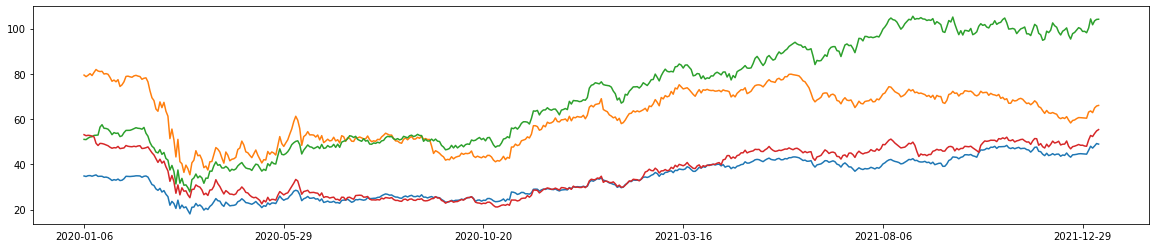

In [26]:
ax = BAC['close'].plot(label='BAC', figsize=(20,4))
C['close'].plot(ax=ax, label='C')
#JPM['close'].plot(ax=ax, label='JPM')
MS['close'].plot(ax=ax, label='MS')
WFC['close'].plot(ax=ax, label='WFC')


Importing COVID CASES GLOBAL


In [27]:
cases=pd.read_csv('time_series_covid19_confirmed_global.csv')

In [28]:
cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902


In [29]:
cases_c=cases.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='Event_Date', value_name='ActiveCases').groupby(by=['Event_Date']).sum()

In [30]:
pd.DataFrame(cases_c)

,Lat,Long,ActiveCases
Event_Date,,,
1/1/21,5603.37955,6057.329414,84335960
1/1/22,5603.37955,6057.329414,289447467
1/10/21,5603.37955,6057.329414,90610569
1/10/22,5603.37955,6057.329414,310776659
1/11/21,5603.37955,6057.329414,91224842
...,...,...,...
9/7/21,5603.37955,6057.329414,222486581
9/8/20,5603.37955,6057.329414,27634635
9/8/21,5603.37955,6057.329414,223113583


In [31]:
cases_c.reset_index(inplace=True)

In [32]:
cases_c['Event_Date']=cases_c['Event_Date'].apply(lambda x: pd.to_datetime(x))

In [33]:
cases_c.sort_values('Event_Date', inplace=True)

In [34]:
cases_c.reset_index(inplace=True)

In [35]:
cases_c.drop('index', axis=1, inplace=True)

In [36]:
cases_c['CaseTrend']=cases_c['ActiveCases'].diff()

In [37]:
cases_c.drop(columns=['Lat', 'Long'], inplace=True)

In [38]:
cases_c.iloc[731]

Event_Date     2022-01-22 00:00:00
ActiveCases              349134552
CaseTrend              2.67025e+06
Name: 731, dtype: object

In [39]:
cases_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Event_Date   732 non-null    datetime64[ns]
 1   ActiveCases  732 non-null    int64         
 2   CaseTrend    731 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 17.3 KB


In [40]:
NewBS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Event_Date  564 non-null    object 
 1   BAC         564 non-null    float64
 2   C           564 non-null    float64
 3   JPM         564 non-null    float64
 4   MS          564 non-null    float64
 5   WFC         564 non-null    float64
 6   Event       202 non-null    object 
dtypes: float64(5), object(2)
memory usage: 31.0+ KB


In [41]:
NewBS.iloc[563]

Event_Date                                         2022-01-10
BAC                                                     48.93
C                                                       66.03
JPM                                                    167.32
MS                                                     104.13
WFC                                                     55.35
Event          Daily COVID-19 Cases in U.S. Surpass 1 Million
Name: 563, dtype: object

In [42]:
cases_c=cases_c[cases_c['Event_Date']<pd.to_datetime('2022-01-11', format='%Y-%m-%d')]

In [43]:
cases_c

,Event_Date,ActiveCases,CaseTrend
0,2020-01-22,557,NaN
1,2020-01-23,655,98.0
2,2020-01-24,941,286.0
3,2020-01-25,1434,493.0
4,2020-01-26,2118,684.0
...,...,...,...
715,2022-01-06,300529608,2620703.0
716,2022-01-07,303463672,2934064.0
717,2022-01-08,305584261,2120589.0
718,2022-01-09,307591154,2006893.0


In [44]:
NewBS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Event_Date  564 non-null    object 
 1   BAC         564 non-null    float64
 2   C           564 non-null    float64
 3   JPM         564 non-null    float64
 4   MS          564 non-null    float64
 5   WFC         564 non-null    float64
 6   Event       202 non-null    object 
dtypes: float64(5), object(2)
memory usage: 31.0+ KB


In [45]:
cases_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 719
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Event_Date   720 non-null    datetime64[ns]
 1   ActiveCases  720 non-null    int64         
 2   CaseTrend    719 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 22.5 KB


In [46]:
NewBS['Event_Date']=NewBS['Event_Date'].apply(lambda x:pd.to_datetime(x))

In [47]:
Alldf=pd.merge(NewBS, cases_c, on='Event_Date', how='outer')

In [49]:
Alldf.sort_values('Event_Date', inplace=True)


In [50]:
Alldf=Alldf.reset_index()

In [51]:
Alldf.drop(columns='index',axis=1, inplace=True)

In [52]:
Alldf.to_excel('Alldf.xlsx')

# Plotting using Plotly express

In [53]:
xbac=Alldf[(Alldf['BAC'].notna()) & (Alldf['BAC']!=0)]['Event_Date'].interpolate()
xc=Alldf[(Alldf['C'].notna()) & (Alldf['C']!=0)]['Event_Date'].interpolate()
xjpm=Alldf[(Alldf['JPM'].notna()) & (Alldf['JPM']!=0)]['Event_Date'].interpolate()
xms=Alldf[(Alldf['MS'].notna()) & (Alldf['MS']!=0)]['Event_Date'].interpolate()
xwfc=Alldf[(Alldf['WFC'].notna()) & (Alldf['WFC']!=0)]['Event_Date'].interpolate()
ybac=Alldf[(Alldf['BAC'].notna()) & (Alldf['BAC']!=0)]['BAC'].interpolate()
yc=Alldf[(Alldf['C'].notna()) & (Alldf['C']!=0)]['C'].interpolate()
yjpm=Alldf[(Alldf['JPM'].notna()) & (Alldf['JPM']!=0)]['JPM'].interpolate()
yms=Alldf[(Alldf['MS'].notna()) & (Alldf['MS']!=0)]['MS'].interpolate()
ywfc=Alldf[(Alldf['WFC'].notna()) & (Alldf['WFC']!=0)]['WFC'].interpolate()

In [82]:
#fig1 = px.line(cases_c, x='Event_Date', y='ActiveCases')
#fig2 = px.line(cases_c, x='Event_Date', y='CaseTrend')
#fig=px.subplot(fig1, fig2, nrows = 2, shareX = TRUE)
fig = make_subplots(rows=3, cols=1, shared_xaxes=True, vertical_spacing=00.02)
fig.add_trace(go.Scatter(x=Alldf['Event_Date'], y=Alldf['ActiveCases'], name="Active Cases"), row=1, col=1)
fig.add_trace(go.Scatter(x=Alldf[Alldf['Event'].notna()]['Event_Date'], y=Alldf[Alldf['Event'].notna()]['ActiveCases'],  hovertemplate=Alldf[Alldf['Event'].notna()]['Event'], mode='markers', marker_symbol='line-ns-open', showlegend=False, name="Event"), row=1, col=1)

fig.add_trace(go.Scatter(x=Alldf['Event_Date'], y=Alldf['CaseTrend'], name="Case Trend"), row=2, col=1)
fig.add_trace(go.Scatter(x=Alldf[Alldf['Event'].notna()]['Event_Date'], y=Alldf[Alldf['Event'].notna()]['CaseTrend'],  hovertemplate=Alldf[Alldf['Event'].notna()]['Event'], mode='markers', marker_symbol='line-ns', showlegend=False, name="Event"), row=2, col=1)


fig.add_trace(go.Scatter(x=xbac, y=ybac, name="BAC"), row=3, col=1)
fig.add_trace(go.Scatter(x=xc, y=yc, name="C"), row=3, col=1)
fig.add_trace(go.Scatter(x=xjpm, y=yjpm, name="JPM"), row=3, col=1)
fig.add_trace(go.Scatter(x=xms, y=yms, name="MS"), row=3, col=1)
fig.add_trace(go.Scatter(x=xwfc, y=ywfc, name="WFC", ), row=3, col=1)
fig.add_trace(go.Scatter(x=Alldf[Alldf['Event'].notna()]['Event_Date'], y=Alldf[Alldf['Event'].notna()]['BAC'],  hovertemplate=Alldf[Alldf['Event'].notna()]['Event'], mode='markers', marker_symbol='line-ns', showlegend=False, name="Event"), row=3, col=1)


fig.update_traces(xaxis='x1')
fig.update_layout(hovermode="x unified", height=700, width=1400, title_text="Covid impact on stock market analyis")